In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
#Planck data:
with open("fisher_data/planck_n=0/planck_sigma_dmeff_n=0.txt") as f:
    data = f.read()
    data = data.split('\n')
    y0 = [float(row.split(' ')[1]) for row in data]
    x0 = [float(row.split(' ')[0]) for row in data]
    step0 = [float(row.split(' ')[2]) for row in data]
    
with open("fisher_data/planck_n=2/planck_sigma_dmeff_n=2.txt") as f2:
    data2 = f2.read()
    data2 = data2.split('\n')
    y2 = [float(row.split(' ')[1]) for row in data2]
    x2 = [float(row.split(' ')[0]) for row in data2]
    step2 = [float(row.split(' ')[2]) for row in data2]

In [205]:
#S4 data:

#Aizhan
# n=0
masses_n0 = [0.001, 0.01, 0.1, 1, 10, 100]
sigma_dmeff_95_S4_n0 = [1.8612307999999997e-27, 2.5382473e-27, 3.1014045e-27, 8.1714275e-27, 5.1384158e-26, 7.6141637e-25]
# n=2
masses_n2 = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
sigma_dmeff_95_S4_n2 = [7.595824e-23, 9.516704800000001e-22, 1.0158481e-20, 7.785000900000001e-20, 5.874233000000001e-19, 7.2368819e-18, 5.9086241e-17]


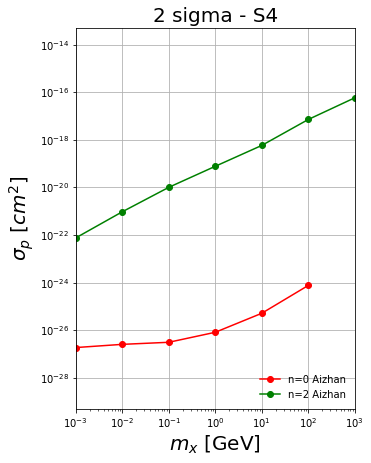

In [215]:
#S4:

fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(masses_n0, sigma_dmeff_95_S4_n0, 'ro-',label='n=0 Aizhan')
ax.plot(masses_n2, sigma_dmeff_95_S4_n2, 'go-',label='n=2 Aizhan')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()

plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel(r"$\sigma_p$ [$cm^2$]",fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection.png")
plt.title('2 sigma - S4',fontsize=20)
plt.show()

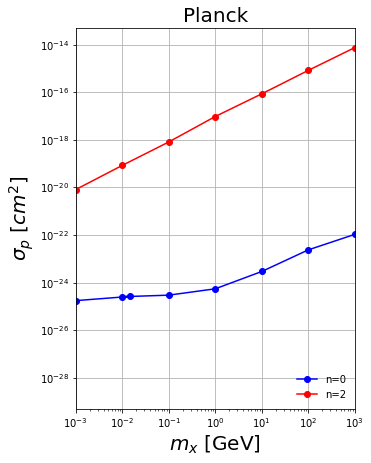

In [211]:
#PLACK:


fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(x0, y0, 'bo-',label='n=0')

ax.plot(x2, y2, 'ro-',label='n=2')
#ax.plot(x4, y4, 'go-',label='n=4')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()


plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel(r"$\sigma_p$ [$cm^2$]",fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/upperlimit_crosssection.png")
plt.title('Planck',fontsize=20)
plt.show()

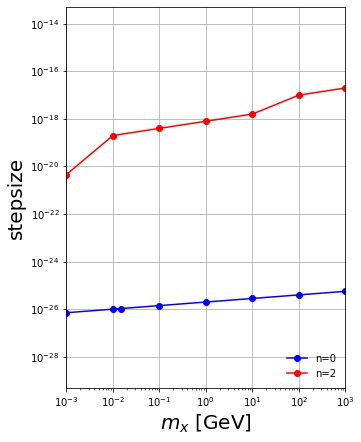

In [87]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(x0, step0, 'bo-',label='n=0')
ax.plot(x2, step2, 'ro-',label='n=2')
#ax.plot(x4, y4, 'go-',label='n=4')
ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()

plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel('stepsize',fontsize=20)


ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', frameon=False)
fig.savefig("fisher_plots/stepsize vs n.png")
plt.show()

/anaconda2/envs/idm/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.35710286e-18 3.92172176e-01 1.00000000e+00]
[1.4340331061231686e-26, 6.30081902435056e-26, 8.268992428164477e-26, 1.08519599615209e-25, 1.4241763555779891e-25, 2.922037395794891e-25, 3.834787986650969e-25]


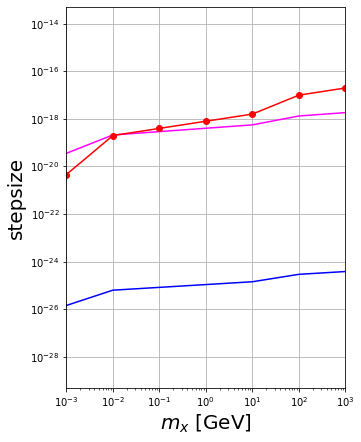

In [199]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powlaw(x, a, b, c):
    return a * np.power(x, b)

def fun(x):
    return 1.3e-10 * np.power(x, 0.47)


fig, ax = plt.subplots(figsize=(5, 7))

popt, pcov = curve_fit(powlaw, x2, step2)

print(popt)
print([i for i in powlaw(step2, *popt)])
ax.plot(x2, powlaw(step2, *popt), 'b-')
ax.plot(x2, fun(step2), 'magenta',label='n=2')

ax.plot(x2, step2, 'ro-',label='n=2')

ax.set(xlabel='DM mass [GeV]', ylabel='cross section [cm^2]')
ax.grid()
plt.xlabel(r"$m_x$ [GeV]", fontsize=20)
plt.ylabel('stepsize',fontsize=20)

ax.set(xlim=(1e-3, 1e3), ylim=(5e-30, 5e-14))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [182]:
xdata = x2
ydata = step2
from scipy.optimize import curve_fit

def powlaw(x, a, b) :
    return a * np.power(x, b)
def linlaw(x, a, b) :
    return a + x * b

def curve_fit_log(xdata, ydata) :
    """Fit data to a power law with weights according to a log scale"""
    # Weights according to a log scale
    # Apply fscalex
    xdata_log = np.log10(xdata)
    # Apply fscaley
    ydata_log = np.log10(ydata)
    # Fit linear
    popt_log, pcov_log = curve_fit(linlaw, xdata_log, ydata_log)
    #print(popt_log, pcov_log)
    # Apply fscaley^-1 to fitted data
    ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))
    # There is no need to apply fscalex^-1 as original data is already available
    return (popt_log, pcov_log, ydatafit_log)

In [50]:
'''im = imread("upperlimit_DM.png")
im2 = imread("figure3_lietal.png")

plt.figure(figsize=(8,8))

#xmin, xmax, ymin, ymax = (8e-4, 1e3, 1e-29, 1e-22 )

aspect = im.shape[0] / im.shape[0] * (xmax-xmin)/(ymax-ymin)


plt.imshow(im2, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect, alpha=0.85)
plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect,alpha=0.65)'''


'im = imread("upperlimit_DM.png")\nim2 = imread("figure3_lietal.png")\n\nplt.figure(figsize=(8,8))\n\n#xmin, xmax, ymin, ymax = (8e-4, 1e3, 1e-29, 1e-22 )\n\naspect = im.shape[0] / im.shape[0] * (xmax-xmin)/(ymax-ymin)\n\n\nplt.imshow(im2, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect, alpha=0.85)\nplt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect,alpha=0.65)'

In [51]:
'''%matplotlib inline
from matplotlib.pyplot import imread


im = imread("screenshot2.png")
im2 = imread("upperlimit_DM.png")

plt.figure(figsize=(8,8))
#plt.yscale('log')
#plt.xscale('log')
# Make sure the figure axis ratio is preserved by adapting the 
# aspect ratio to the axis range

#xmin, xmax, ymin, ymax = (1e-5, 1e3, 1e-29, 1e-22)

xmin, xmax, ymin, ymax = (np.log(1e-4), np.log(1e2), np.log(1e-29), np.log(1e-23) )

#x1 = np.log(xmax) - np.log(xmin)
#y1 = np.log(ymax) - np.log(ymin)
#aspect = im.shape[0] / im.shape[0] * x1/y1
aspect = im.shape[0] / im.shape[0] * (xmax-xmin)/(ymax-ymin)


plt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)
xlog = [np.log(i) for i in x]
ylog = [np.log(j) for j in y]
plt.plot(xlog, ylog, "ro-", linewidth=4, label='planck',zorder=1)
#plt.yscale("log")
#plt.xscale("log")

ax.grid()

plt.legend(loc='upper left', frameon=False)
plt.axis([xmin, xmax, ymin, ymax]);
plt.show()'''

'%matplotlib inline\nfrom matplotlib.pyplot import imread\n\n\nim = imread("screenshot2.png")\nim2 = imread("upperlimit_DM.png")\n\nplt.figure(figsize=(8,8))\n#plt.yscale(\'log\')\n#plt.xscale(\'log\')\n# Make sure the figure axis ratio is preserved by adapting the \n# aspect ratio to the axis range\n\n#xmin, xmax, ymin, ymax = (1e-5, 1e3, 1e-29, 1e-22)\n\nxmin, xmax, ymin, ymax = (np.log(1e-4), np.log(1e2), np.log(1e-29), np.log(1e-23) )\n\n#x1 = np.log(xmax) - np.log(xmin)\n#y1 = np.log(ymax) - np.log(ymin)\n#aspect = im.shape[0] / im.shape[0] * x1/y1\naspect = im.shape[0] / im.shape[0] * (xmax-xmin)/(ymax-ymin)\n\n\nplt.imshow(im, zorder=0, extent=[xmin, xmax, ymin, ymax], aspect=aspect)\nxlog = [np.log(i) for i in x]\nylog = [np.log(j) for j in y]\nplt.plot(xlog, ylog, "ro-", linewidth=4, label=\'planck\',zorder=1)\n#plt.yscale("log")\n#plt.xscale("log")\n\nax.grid()\n\nplt.legend(loc=\'upper left\', frameon=False)\nplt.axis([xmin, xmax, ymin, ymax]);\nplt.show()'